# Nobel Prize Data Analysis

### *Author:* Grady Cooke
### *Date:* June 9, 2025

## Summary

In this project, I analyzed data from the Nobel Prize dataset to explore trends in laureate demographics and achievements. My goal was to uncover insights such as the distribution of awards across categories and decades, the representation of women over time, and notable individuals or organizations who have received multiple Nobel Prizes. Through data manipulation and visualization, I identified patterns and key milestones, such as the first woman laureate and the categories with the highest female representation. This analysis highlights both historical and recent shifts in Nobel recognition.

## Dataset Overview

In [4]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
nobel = pd.read_csv("nobel.csv")

# Preview the data
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [5]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [6]:
nobel.describe(include='all')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
count,1000.000000,1000,1000,912,1000,1000.000000,1000,1000,968,964,969,970,736,735,735,596,579,585
unique,NaN,6,621,615,4,NaN,2,993,949,649,129,2,325,195,29,585,293,50
top,NaN,Medicine,The Nobel Prize in Chemistry 1972,"""for their studies of extremely fast chemical ...",1/1,NaN,Individual,Comité international de la Croix Rouge (Intern...,1932-10-24,"New York, NY",United States of America,Male,University of California,"Cambridge, MA",United States of America,2013-11-19,Paris,United States of America
freq,NaN,227,3,3,358,NaN,966,3,2,55,291,905,36,53,385,2,27,206
mean,1973.721000,NaN,NaN,NaN,NaN,509.099000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,34.523195,NaN,NaN,NaN,NaN,298.130617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1901.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1949.750000,NaN,NaN,NaN,NaN,250.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1979.000000,NaN,NaN,NaN,NaN,500.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2003.000000,NaN,NaN,NaN,NaN,764.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The Nobel Prize dataset contains 1,000 entries spanning from 1901 to 2023, covering six main categories: Chemistry, Literature, Medicine, Peace, Physics, and Economics. The most frequently awarded category is Medicine, with 227 prizes. The dataset also includes detailed biographical and institutional information, allowing for rich analysis of geographic, institutional, and demographic trends over time.


## What is the top gender awarded?

In [9]:
top_gender = nobel["sex"].value_counts().idxmax()
print(f"The most commonly awarded gender is: {top_gender}.")

The most commonly awarded gender is: Male.


## What is the top country awarded?

In [11]:
top_country = nobel["birth_country"].value_counts().idxmax()
print(f"The most common country of birth among Nobel Prize winners is: {top_country}.")

The most common country of birth among Nobel Prize winners is: United States of America.


Based on the analysis, the most commonly awarded gender among Nobel Prize winners is Male, which reflects historical gender disparities in recognition across scientific and humanitarian fields. Additionally, the United States of America is the top country of birth among laureates, highlighting its longstanding global influence in research and peace initiatives. These results are perhaps unsurprising. 

## Which decade had the highest proportion of US-born winners to total winners in all categories?

In [14]:
# Extract the decade from the year
nobel["decade"] = (nobel["year"] // 10) * 10

# Filter for U.S. winners
nobel["is_usa"] = (nobel["birth_country"] == "United States of America")

# Calculate proportion by decade
us_ratio_by_decade = nobel.groupby("decade")["is_usa"].mean()

# Find the decade with max proportion of U.S. winners and print
max_decade_usa = us_ratio_by_decade.idxmax()
print(f"The decade with the highest proportion of US-born Nobel Prize winners is: The {max_decade_usa}s.")

The decade with the highest proportion of US-born Nobel Prize winners is: The 2000s.


The results show that the 2000s had the highest proportion of Nobel Prize winners born in the United States compared to other decades. How has the proportion of US-born winners to total winners changed over time?

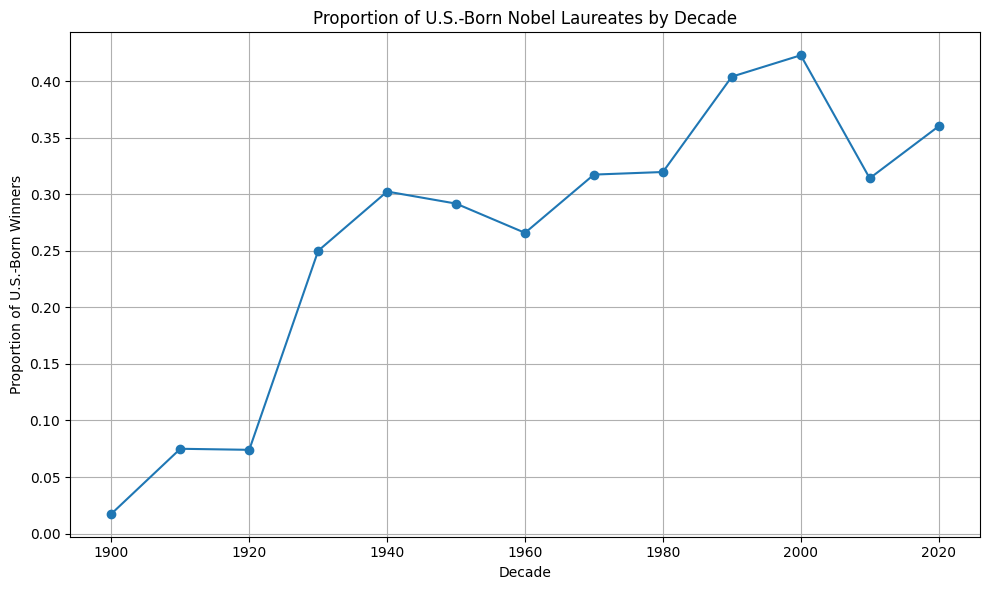

In [16]:
# Plot proportion of US-born winners by decade
plt.figure(figsize=(10, 6))
plt.plot(us_ratio_by_decade.index, us_ratio_by_decade.values, marker="o")
plt.title("Proportion of U.S.-Born Nobel Laureates by Decade")
plt.xlabel("Decade")
plt.ylabel("Proportion of U.S.-Born Winners")
plt.grid(True)
plt.tight_layout()
plt.show()

The plot shows a steady increase in the proportion of U.S.-born Nobel laureates throughout the 20th century, peaking in the 2000s. This trend reflects the growing global influence of the United States in science, literature, and peace efforts during the post-World War II era, with a slight decline in the 2010s followed by a rebound in the 2020s.

## Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [19]:
# Calculate the proportion of female laureates per decade
nobel["female_winner"] = nobel["sex"] == "Female"
prop_female_winners = nobel.groupby(["decade", "category"], as_index=False)["female_winner"].mean()

# Find the decade and category with the highest proportion of female winners
max_female_decade_category = prop_female_winners[prop_female_winners["female_winner"] == prop_female_winners["female_winner"].max()][["decade", "category"]]

# Save decade and category with the highest proportion of female winners and print
decade = max_female_decade_category["decade"].values[0]
category = max_female_decade_category["category"].values[0]
print(f"In the {decade}s, the '{category}' category had the highest proportion of female Nobel laureates.")

In the 2020s, the 'Literature' category had the highest proportion of female Nobel laureates.


This result highlights a notable rise in gender representation within the Literature category during the 2020s. To better understand this trend over time, the following graph visualizes the proportion of female laureates across all Nobel categories by decade.

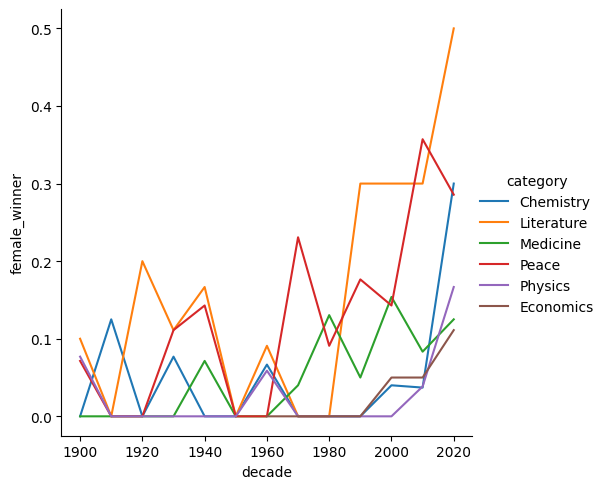

In [21]:
# Plotting female winners with % winners on the y-axis
ax2 = sns.relplot(x="decade", y="female_winner", hue="category", data=prop_female_winners, kind="line")

The graph shows that the proportion of female Nobel laureates has generally increased over time, with noticeable growth starting around the 1980s. The Literature and Peace categories display the most consistent and significant rises, peaking in the 2020s. In contrast, fields like Physics and Economics still show relatively low female representation, indicating ongoing gender disparities in certain disciplines.

## Who was the first woman to receive a Nobel Prize, and in what category?

In [24]:
# Filter for female laureates and sort by year
first_woman = nobel[nobel["sex"] == "Female"].sort_values("year").iloc[0]

# Save the name and category as strings
first_woman_name = first_woman["full_name"]
first_woman_category = first_woman["category"]

# Print the results
print(f"The first woman to receive a Nobel Prize was {first_woman_name} in the category of {first_woman_category}.")

The first woman to receive a Nobel Prize was Marie Curie, née Sklodowska in the category of Physics.


Marie Curie was indeed the first woman to receive a Nobel Prize, awarded in Physics in 1903 for her research on radioactivity.

## Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [27]:
# Count how many times each name appears
counts = nobel["full_name"].value_counts()

# Filter names that appear two or more times
repeat_counts = counts[counts >= 2].sort_values(ascending=False)

# Print formatted results
print("The following individuals or organizations have won more than one Nobel Prize:\n")
for i, (name, count) in enumerate(repeat_counts.items(), start=1):
    print(f"{i}. {name} — {count} prizes")

The following individuals or organizations have won more than one Nobel Prize:

1. Comité international de la Croix Rouge (International Committee of the Red Cross) — 3 prizes
2. Linus Carl Pauling — 2 prizes
3. John Bardeen — 2 prizes
4. Frederick Sanger — 2 prizes
5. Marie Curie, née Sklodowska — 2 prizes
6. Office of the United Nations High Commissioner for Refugees (UNHCR) — 2 prizes


A small group of individuals and organizations have received more than one Nobel Prize, with notable examples including Marie Curie, who later won a second Nobel in Chemistry.

## Conclusion

The Nobel Prize dataset reveals important historical and social trends in global achievement. While male laureates and U.S.-born winners have dominated much of the 20th and early 21st centuries, recent decades show increasing recognition of female contributors, especially in categories like Literature and Peace. Repeat winners such as Marie Curie highlight exceptional impact across fields. Overall, the data illustrates both progress and persistent disparities in how global excellence is acknowledged.